In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from ecephys import utils
from findlay2025a import core
from findlay2025a.constants import Experiments as Exps

In [2]:
nb = core.get_project()
rips = pd.read_parquet(nb.get_project_file("ripples.pqt"))
spws = pd.read_parquet(nb.get_project_file("spws.pqt"))

In [3]:
def get_curve(spws: pd.Series, rips: pd.Series) -> tuple[np.ndarray, np.ndarray]:
    lo = min(spws["ripple_dB"].quantile(0.01), rips["dB"].quantile(0.01))
    hi = max(spws["ripple_dB"].quantile(0.99), rips["dB"].quantile(0.99))
    x = np.linspace(lo, hi, 1000)
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = len(
            spws[(spws["ripple_dB"] < x[i]) & (spws["ripple_count"] == 0)]
        ) / len(spws)
    return x, y


def plot_cutoff_lines(
    ax: plt.Axes, x: np.ndarray, y: np.ndarray, lines=[0.05, 0.1, 0.15]
):
    for cut in lines:
        i = utils.find_nearest(y, cut)
        ax.axvline(x[i], color="k", linestyle="--", linewidth=0.5)
        ax.text(
            x[i],
            0.99,
            f"{int(cut * 100)}%",
            color="r",
            ha="right",
            va="top",
            rotation=90,
            transform=ax.get_xaxis_transform(),
        )

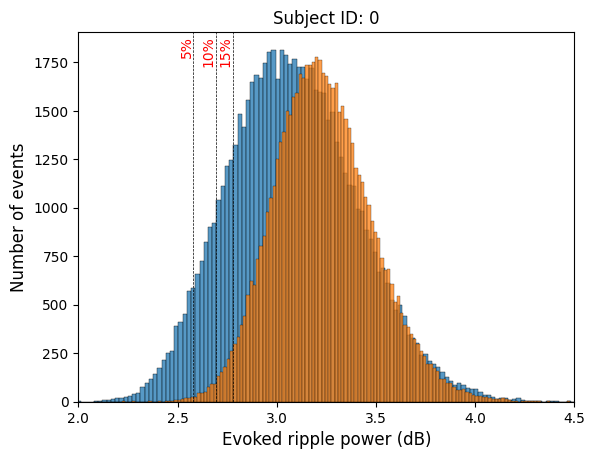

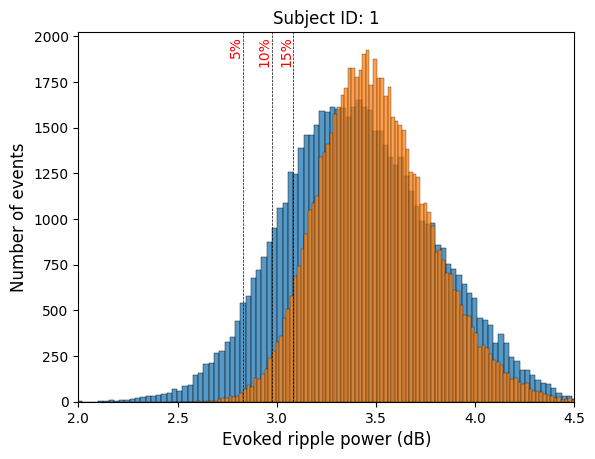

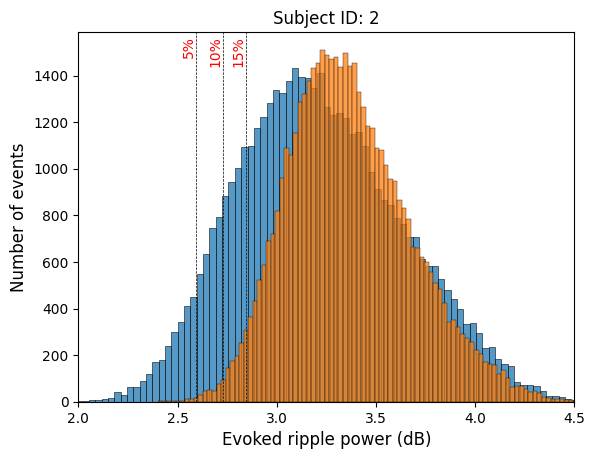

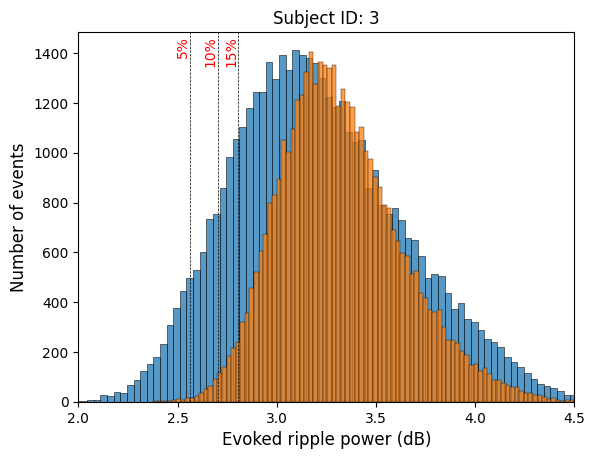

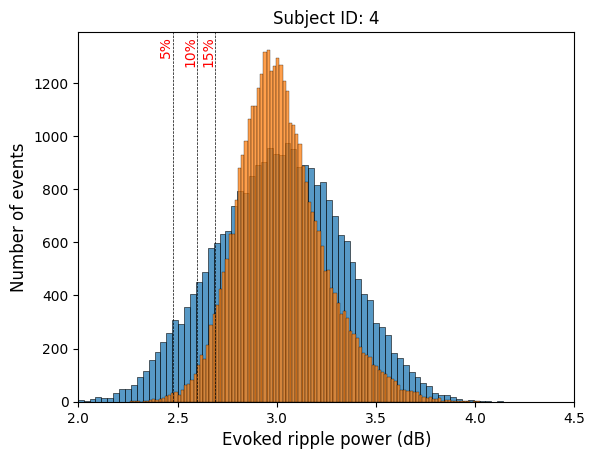

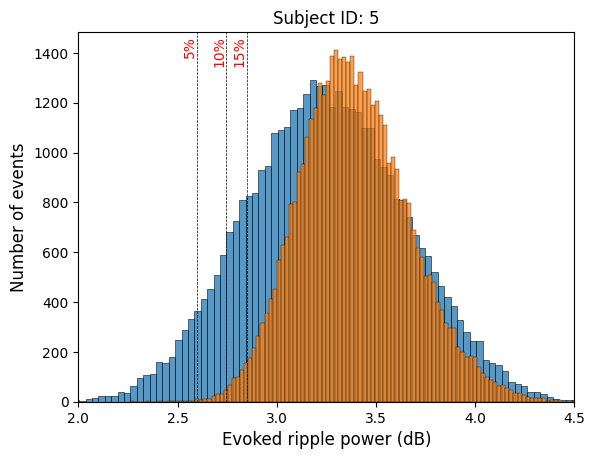

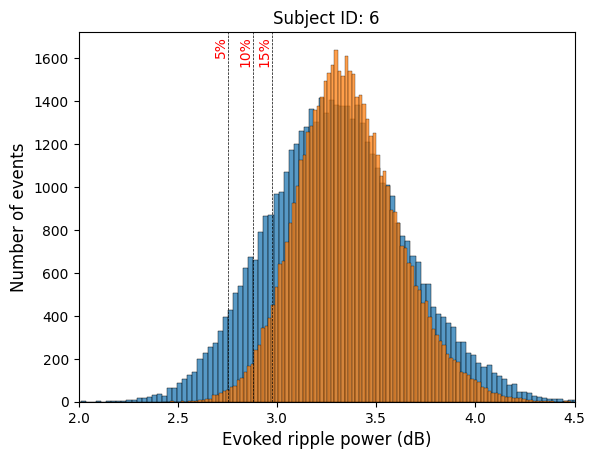

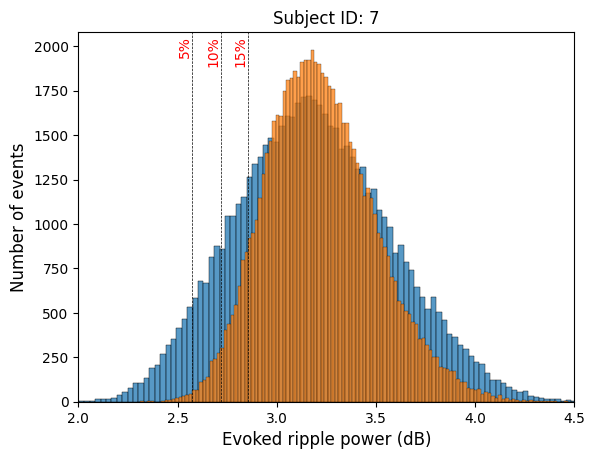

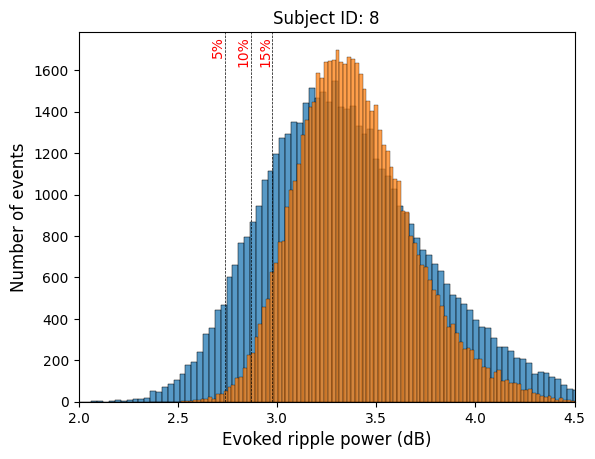

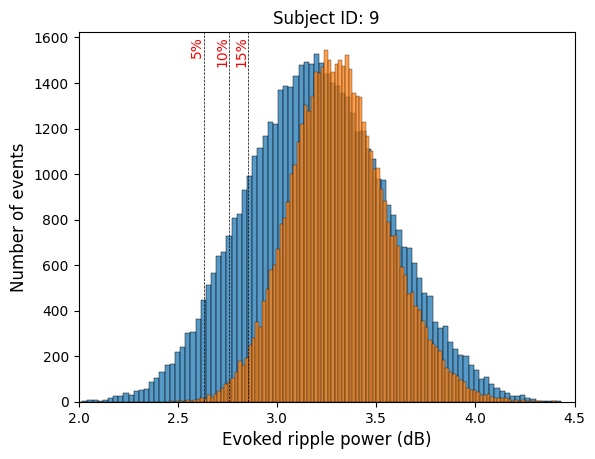

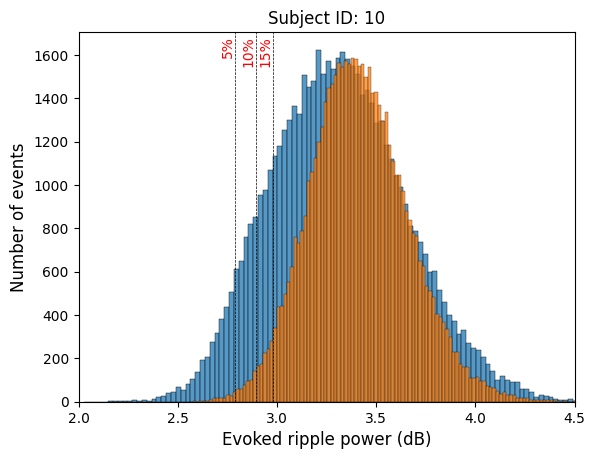

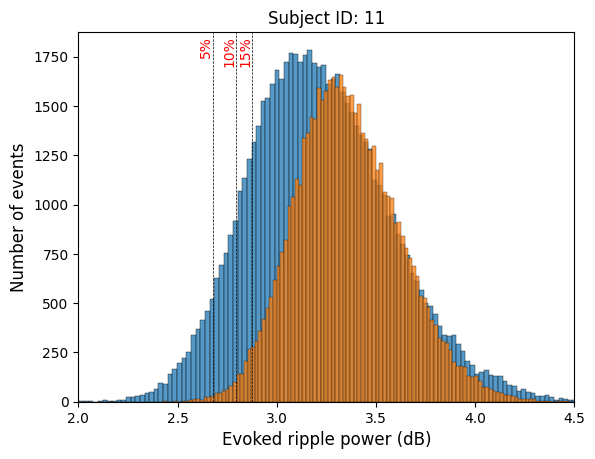

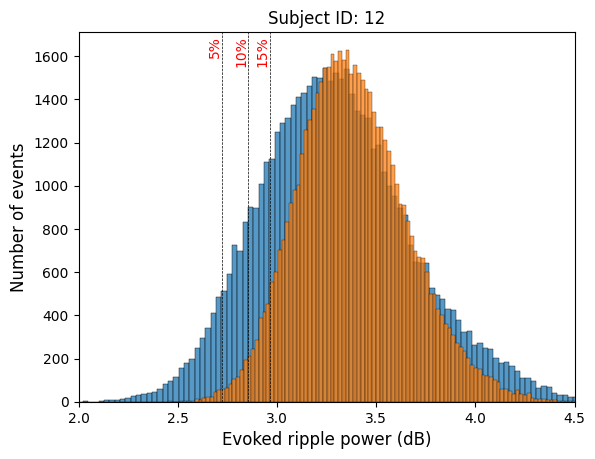

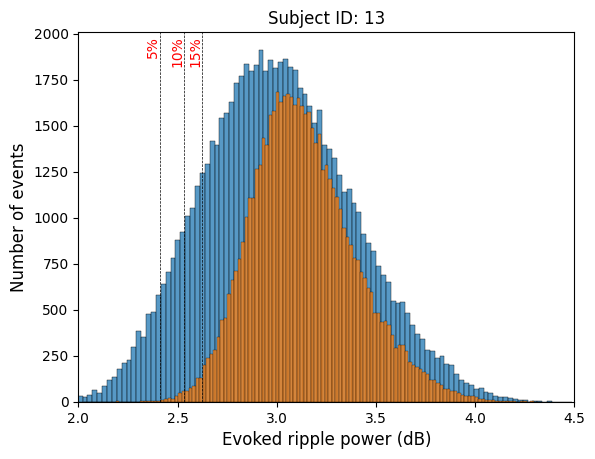

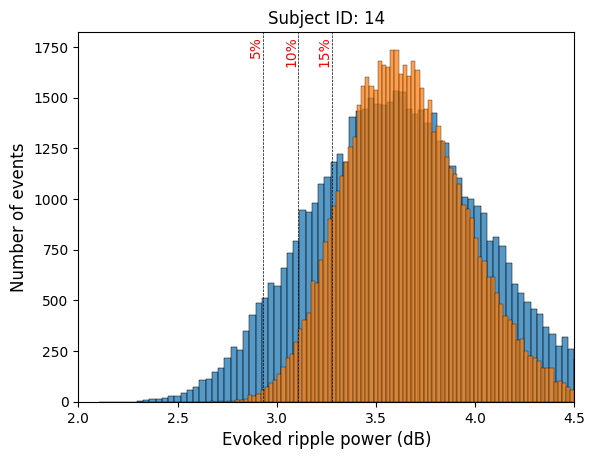

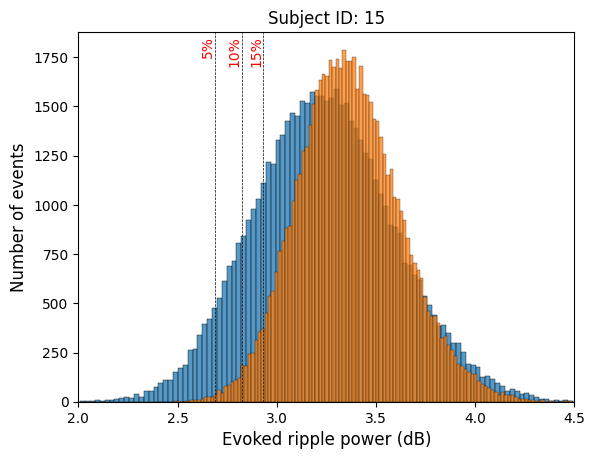

In [4]:
for i, (sglx_subject, experiment) in enumerate(
    core.yield_sglx_subject_experiment_pairs(experiments=[Exps.NOD])
):
    fig, ax = plt.subplots()
    _spws = spws[
        (spws["subject"] == sglx_subject.name) & (spws["experiment"] == experiment)
    ]
    _rips = rips[
        (rips["subject"] == sglx_subject.name) & (rips["experiment"] == experiment)
    ]
    sns.histplot(_spws, x="ripple_dB", ax=ax)
    sns.histplot(_rips, x="dB", ax=ax)
    x, y = get_curve(_spws, _rips)
    plot_cutoff_lines(ax, x, y)
    ax.set_xlim(2.0, 4.5)
    ax.set_xlabel("Evoked ripple power (dB)", fontsize=12)
    ax.set_ylabel("Number of events", fontsize=12)
    ax.set_title(f"Subject ID: {i}")
    # fig.savefig(nb.get_project_file(f'figures/sub{i}_novelty_evoked_dB_distribution.png'), bbox_inches='tight', dpi=600)